# Project P4 report

## Replication report

In this report, we will replicate the following figure, taken from *David Muchlinski et al. Comparing Random Forest with Logistic Regression for Predicting Class-Imbalanced Civil War Onset Data (2015).* (NB! For some reason, the figure is not showing on Github)

<img src="data/original.png">



The data is stored in the data folder in .csv format. First, we import the libraries we will use and the data and store it in a dataframe.

In [2]:
#import libraries to use dataframes
import pandas as pd
import numpy as np

#we use sklearn for the logistic regression learning algorithm
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import auc


#import the data
DATA_FOLDER = 'data/'
DATASET = DATA_FOLDER+"SambnisImp.csv"

#Opening and loading of files
df = pd.read_csv(DATASET, error_bad_lines=False, warn_bad_lines=True)

The three curves are obtained from training a logistic regression classifier on parts of the dataset. Each curve represents one scientific paper with a specific selection of variables. To denote variables in this document we use the identifiers "fearon", "collier" and "hegre" to refer to the three different papers:

<ul>
<li>Fearon and Laitin (2003)</li>
<li>Collier and Hoeffler (2004)</li>
<li>Hegre and Sambanis (2006)</li>
</ul>

We filter the original data into the three samples used for the classifiers. We also create a variable with the labels (the "warstds" variable in the data.)

In [3]:
x_fearon = df[["warhist", "ln_gdpen", "lpopns", "lmtnest",
    "ncontig", "oil", "nwstate", "inst3", "pol4", "ef", "relfrac"]]

x_collier = df[["sxpnew", "sxpsq", "ln_gdpen", "gdpgrowth",
    "warhist", "lmtnest", "ef", "popdense", "lpopns", "coldwar", "seceduc",
    "ptime"]]

x_hegre = df[["lpopns", "ln_gdpen", "inst3", "parreg", "geo34",
    "proxregc", "gdpgrowth", "anoc", "partfree", "nat_war", "lmtnest",
    "decade1", "pol4sq", "nwstate", "regd4_alt", "etdo4590", "milper", "geo1",
    "tnatwar", "presi"]]

y = df["warstds"]

In [13]:
cw_perc = 100*df["warstds"].mean()

print("Percentage of countries at civil war: " + str(round(cw_perc, 2)) + "%")

print("The data is clearly very unbalanced")

Percentage of countries at civil war: 1.62%
The data is clearly very unbalanced


In the Muchlinski paper they specify that the training process is performed by splitting the data into 10 folds. Then, the model is trained using the first 9 folds and validated using the last fold. The process is repeated 9 times and finally a combined model is obtained. This is a powerful model because it is less susceptible to overfitting. An example of such an algorithm is K-folds. 

Since our data is very unbalanced we will use an enhanced version of K-folds called stratified K-folds. In essence, stratified K-folds creates folds where the data is as balanced as possible in order not to have folds where all the labels have the same value (f.ex. no labels predicting civil war).

## Models without penalty:

The following three cells calculates, for each of the civil war models, the logistic regression model using <b>no penalty.</b>

For each fold we calculate the parametres needed to plot the ROC-curve:
<ul>
<li>TPR, true positive rate</li>
<li>FPR, false positive rate</li>
<li>AUC, area under curve</li>
</ul>

Finally, we plot all the ROC-curves superposed together with the mean ROC curve. In the end, we will use the mean ROC values to construct the replication figure.


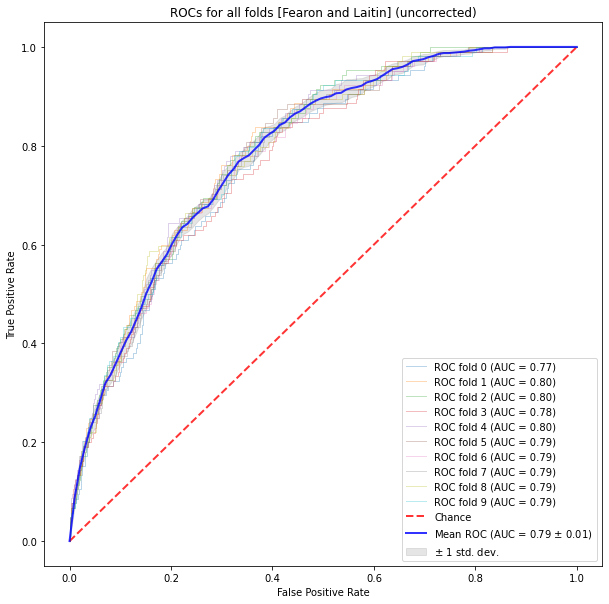

In [23]:
#Non-penalized regression using Fearon parametres

#Objects to store the calculated tpr (true positive rate), fpr(false positive rate) and auc (area under curve)
tprs = []
aucs = []
mean_fpr_fearon = np.linspace(0, 1, 100)
kf_fearon = StratifiedKFold(n_splits=10)
kf_fearon.split(x_fearon,y)  

fig, ax = plt.subplots(figsize=(10,10))

#For each fold, calculate the ROC-parametres (tpr, fpr and auc) and plot
for i, (train_index, test_index) in enumerate(kf_fearon.split(x_fearon,y)):
    X_train_fearon, X_test_fearon = x_fearon.iloc[train_index], x_fearon.iloc[test_index]
    y_train_fearon, y_test_fearon = y[train_index], y[test_index]
    classifier  =LogisticRegression(max_iter = 10000, penalty = 'none').fit(X_train_fearon, y_train_fearon)
    viz = plot_roc_curve(classifier,X_train_fearon, y_train_fearon,
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr_fearon, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

#Calculate the mean and standard deviation of ROC-parametres
mean_tpr_fearon = np.mean(tprs, axis=0)
mean_tpr_fearon[-1] = 1.0
mean_auc_fearon = auc(mean_fpr_fearon, mean_tpr_fearon)
std_auc = np.std(aucs)
ax.plot(mean_fpr_fearon, mean_tpr_fearon, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc_fearon, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr_fearon + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr_fearon - std_tpr, 0)
ax.fill_between(mean_fpr_fearon, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="ROCs for all folds [Fearon and Laitin] (uncorrected)")
ax.legend(loc="lower right")
plt.show()

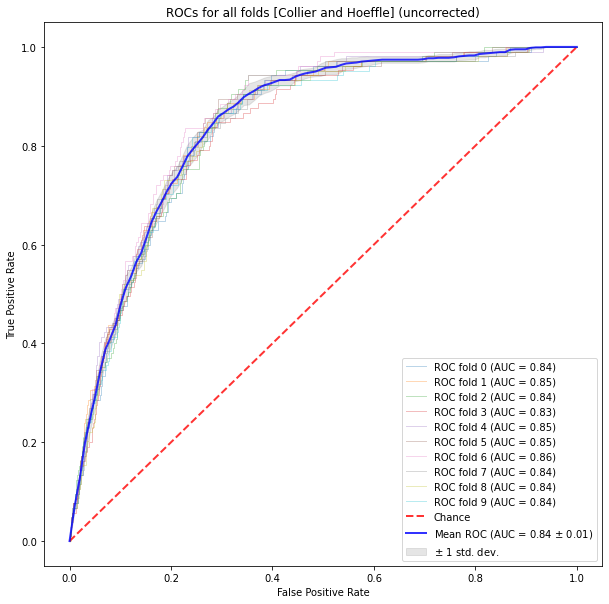

In [14]:
#Non-penalized regression using Collier parametres

#Objects to store the calculated tpr (true positive rate), fpr(false positive rate) and auc (area under curve)
tprs = []
aucs = []
mean_fpr_collier = np.linspace(0, 1, 100)
kf_collier = StratifiedKFold(n_splits=10)
kf_collier.split(x_collier,y)  

fig, ax = plt.subplots(figsize=(10,10))

#For each fold, calculate the ROC-parametres (tpr, fpr and auc) and plot
for i, (train_index, test_index) in enumerate(kf_collier.split(x_collier,y)):
    X_train_collier, X_test_collier = x_collier.iloc[train_index], x_collier.iloc[test_index]
    y_train_collier, y_test_collier = y[train_index], y[test_index]
    classifier  =LogisticRegression(max_iter = 10000, penalty = 'none').fit(X_train_collier, y_train_collier)
    viz = plot_roc_curve(classifier,X_train_collier, y_train_collier,
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr_collier, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

#Calculate the mean and standard deviation of ROC-parametres
mean_tpr_collier = np.mean(tprs, axis=0)
mean_tpr_collier[-1] = 1.0
mean_auc_collier = auc(mean_fpr_collier, mean_tpr_collier)
std_auc = np.std(aucs)
ax.plot(mean_fpr_collier, mean_tpr_collier, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc_collier, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr_collier + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr_collier - std_tpr, 0)
ax.fill_between(mean_fpr_collier, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="ROCs for all folds [Collier and Hoeffle] (uncorrected)")
ax.legend(loc="lower right")
plt.show()

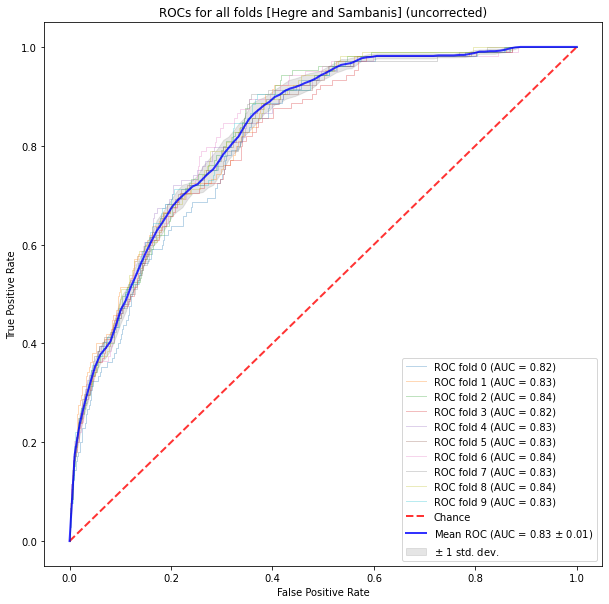

In [15]:
#Non-penalized regression using Hegre parametres

#Objects to store the calculated tpr (true positive rate), fpr(false positive rate) and auc (area under curve)
tprs = []
aucs = []
mean_fpr_hegre = np.linspace(0, 1, 100)
kf_hegre = StratifiedKFold(n_splits=10)
kf_hegre.split(x_hegre,y)  

fig, ax = plt.subplots(figsize=(10,10))

#For each fold, calculate the ROC-parametres (tpr, fpr and auc) and plot
for i, (train_index, test_index) in enumerate(kf_hegre.split(x_hegre,y)):
    X_train_hegre, X_test_hegre = x_hegre.iloc[train_index], x_hegre.iloc[test_index]
    y_train_hegre, y_test_hegre = y[train_index], y[test_index]
    classifier  =LogisticRegression(max_iter = 10000, penalty = 'none').fit(X_train_hegre, y_train_hegre)
    viz = plot_roc_curve(classifier,X_train_hegre, y_train_hegre,
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr_hegre, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

#Calculate the mean and standard deviation of ROC-parametres
mean_tpr_hegre = np.mean(tprs, axis=0)
mean_tpr_hegre[-1] = 1.0
mean_auc_hegre = auc(mean_fpr_hegre, mean_tpr_hegre)
std_auc = np.std(aucs)
ax.plot(mean_fpr_hegre, mean_tpr_hegre, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc_hegre, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr_hegre + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr_hegre - std_tpr, 0)
ax.fill_between(mean_fpr_hegre, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="ROCs for all folds [Hegre and Sambanis] (uncorrected)")
ax.legend(loc="lower right")
plt.show()

## Models with L2 penalty:

The following three cells calculates, for each of the civil war models, the logistic regression model using <b>L2 penalty.</b>

Similarly as before, we calculate the ROC-parametres for each fold and plot them superposed. When using L2-penalization we also define a parameter "C" in the regression model. C is defined as the inverse of the regularization strength. It determines how much we should penalize large parameters (decision boundaries) in our model. Thus, we can change the C-parameter to regulate the overfitting. A lower C-value penalizes more and therefore reduces overfitting. We tried several different C-values and the ones chosen replicates best the data from the Muchlinski paper.

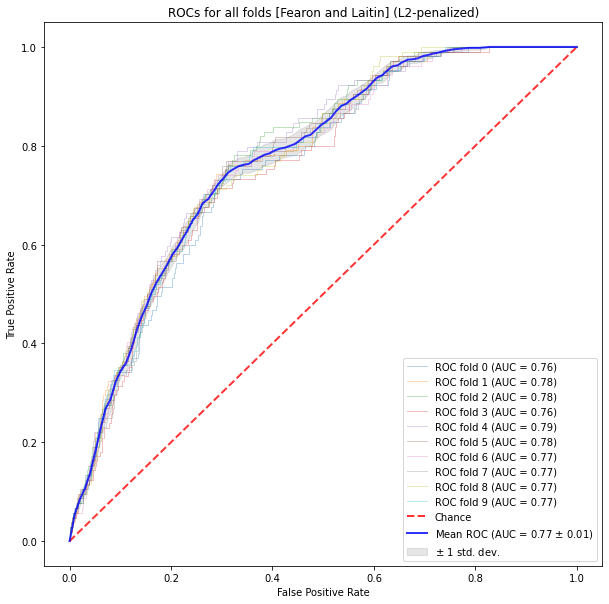

In [17]:
#Penalized regression using Fearon parametres:

#Objects to store the calculated tpr (true positive rate), fpr(false positive rate) and auc (area under curve)
tprs = []
aucs = []
mean_fpr_fearon2 = np.linspace(0, 1, 100)
kf_fearon2 = StratifiedKFold(n_splits=10)
kf_fearon2.split(x_fearon,y)  

fig, ax = plt.subplots(figsize=(10,10))

#For each fold, calculate the ROC-parametres (tpr, fpr and auc) and plot
for i, (train_index, test_index) in enumerate(kf_fearon2.split(x_fearon,y)):
    X_train_fearon2, X_test_fearon2 = x_fearon.iloc[train_index], x_fearon.iloc[test_index]
    y_train_fearon2, y_test_fearon2 = y[train_index], y[test_index]
    classifier  =LogisticRegression(max_iter = 10000, penalty = 'l2', C=0.05).fit(X_train_fearon2, y_train_fearon2)
    viz = plot_roc_curve(classifier,X_train_fearon2, y_train_fearon2,
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr_fearon2, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

#Calculate the mean and standard deviation of ROC-parametres
mean_tpr_fearon2 = np.mean(tprs, axis=0)
mean_tpr_fearon2[-1] = 1.0
mean_auc_fearon2 = auc(mean_fpr_fearon2, mean_tpr_fearon2)
std_auc = np.std(aucs)
ax.plot(mean_fpr_fearon2, mean_tpr_fearon2, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc_fearon2, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr_fearon2 + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr_fearon2 - std_tpr, 0)
ax.fill_between(mean_fpr_fearon2, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="ROCs for all folds [Fearon and Laitin] (L2-penalized)")
ax.legend(loc="lower right")
plt.show()

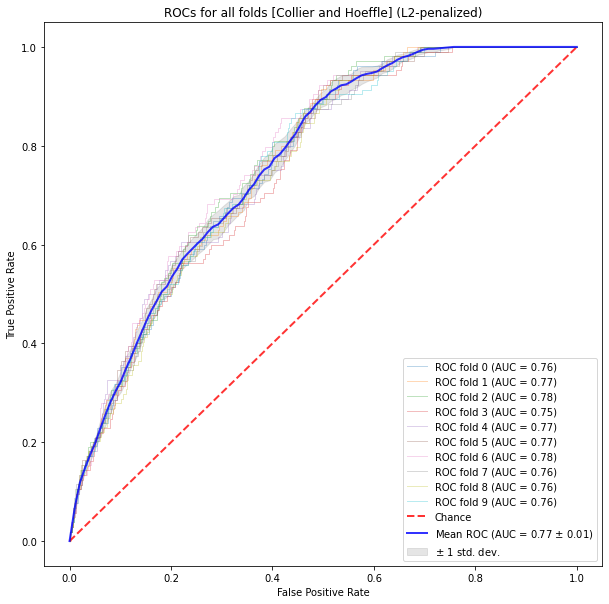

In [18]:
#Penalized regression using Collier parametres:

#Objects to store the calculated tpr (true positive rate), fpr(false positive rate) and auc (area under curve)
tprs = []
aucs = []
mean_fpr_collier2 = np.linspace(0, 1, 100)
kf_collier2 = StratifiedKFold(n_splits=10)
kf_collier2.split(x_collier,y)  

fig, ax = plt.subplots(figsize=(10,10))

#For each fold, calculate the ROC-parametres (tpr, fpr and auc) and plot
for i, (train_index, test_index) in enumerate(kf_collier2.split(x_collier,y)):
    X_train_collier2, X_test_collier2 = x_collier.iloc[train_index], x_collier.iloc[test_index]
    y_train_collier2, y_test_collier2 = y[train_index], y[test_index]
    classifier  =LogisticRegression(max_iter = 10000, penalty = 'l2', C=1).fit(X_train_collier2, y_train_collier2)
    viz = plot_roc_curve(classifier,X_train_collier2, y_train_collier2,
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr_collier2, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

#Calculate the mean and standard deviation of ROC-parametres
mean_tpr_collier2 = np.mean(tprs, axis=0)
mean_tpr_collier2[-1] = 1.0
mean_auc_collier2 = auc(mean_fpr_collier2, mean_tpr_collier2)
std_auc = np.std(aucs)
ax.plot(mean_fpr_collier2, mean_tpr_collier2, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc_collier2, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr_collier2 + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr_collier2 - std_tpr, 0)
ax.fill_between(mean_fpr_collier2, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="ROCs for all folds [Collier and Hoeffle] (L2-penalized)")
ax.legend(loc="lower right")
plt.show()

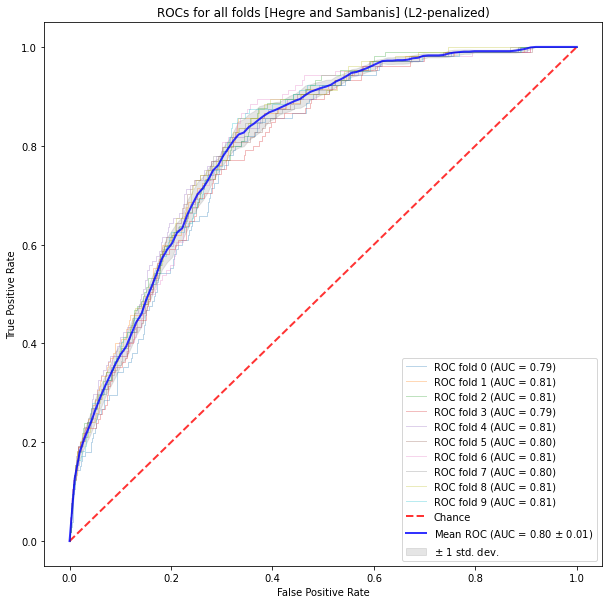

In [20]:
#Penalized regression using Hegre parametres:

#Objects to store the calculated tpr (true positive rate), fpr(false positive rate) and auc (area under curve)
tprs = []
aucs = []
mean_fpr_hegre2 = np.linspace(0, 1, 100)
kf_hegre2 = StratifiedKFold(n_splits=10)
kf_hegre2.split(x_hegre,y)  

fig, ax = plt.subplots(figsize=(10,10))

#For each fold, calculate the ROC-parametres (tpr, fpr and auc) and plot
for i, (train_index, test_index) in enumerate(kf_hegre2.split(x_hegre,y)):
    X_train_hegre2, X_test_hegre2 = x_hegre.iloc[train_index], x_hegre.iloc[test_index]
    y_train_hegre2, y_test_hegre2 = y[train_index], y[test_index]
    classifier  =LogisticRegression(max_iter = 10000, penalty = 'l2', C=0.1).fit(X_train_hegre2, y_train_hegre2)
    viz = plot_roc_curve(classifier,X_train_hegre2, y_train_hegre2,
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr_hegre2, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

#Calculate the mean and standard deviation of ROC-parametres
mean_tpr_hegre2 = np.mean(tprs, axis=0)
mean_tpr_hegre2[-1] = 1.0
mean_auc_hegre2 = auc(mean_fpr_hegre2, mean_tpr_hegre2)
std_auc = np.std(aucs)
ax.plot(mean_fpr_hegre2, mean_tpr_hegre2, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc_hegre2, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr_hegre2 + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr_hegre2 - std_tpr, 0)
ax.fill_between(mean_fpr_hegre2, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="ROCs for all folds [Hegre and Sambanis] (L2-penalized)")
ax.legend(loc="lower right")
plt.show()

Finally, we will plot all the results in two plots similar to what the Muchlinski paper does:

## Replication of figure:

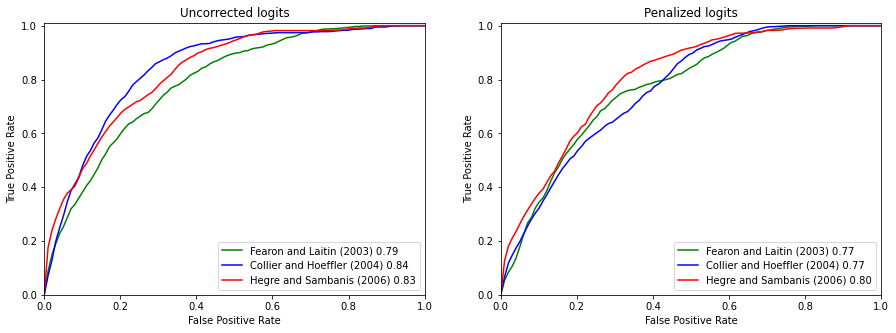

In [21]:
#Replication of figure

#fig = plt.figure()
f, axs = plt.subplots(2,2,figsize=(15,5))

#plot data for the left figure (uncorrected data)
plt.subplot(1, 2, 1)
plt.title('Uncorrected logits')
plt.plot(mean_fpr_fearon, mean_tpr_fearon, 'g', label = 'Fearon and Laitin (2003) %0.2f' % mean_auc_fearon)
plt.plot(mean_fpr_collier, mean_tpr_collier, 'b', label = 'Collier and Hoeffler (2004) %0.2f' % mean_auc_collier)
plt.plot(mean_fpr_hegre, mean_tpr_hegre, 'r', label = 'Hegre and Sambanis (2006) %0.2f' % mean_auc_hegre)

#set plot parametres
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

#plot data for the right figure (penalized data)
plt.subplot(1, 2, 2)
plt.title('Penalized logits')
plt.plot(mean_fpr_fearon2, mean_tpr_fearon2, 'g', label = 'Fearon and Laitin (2003) %0.2f' % mean_auc_fearon2)
plt.plot(mean_fpr_collier2, mean_tpr_collier2, 'b', label = 'Collier and Hoeffler (2004) %0.2f' % mean_auc_collier2)
plt.plot(mean_fpr_hegre2, mean_tpr_hegre2, 'r', label = 'Hegre and Sambanis (2006) %0.2f' % mean_auc_hegre2)

#set plot parametres
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

We observe that the results obtained are not exactly the same as in the Muchlinski paper. There might be several reasons for this. One of the principal reasons is that when using K-folds, we essentially have a stochastic algorithm which will not necessarily reproduce exactly the same results each time we run it since there is a degree of chance.

We also note that by changing the C-parameter (level of penalization) we could tune the AUC-values in the right figure to match exactly the results in Muchlinski. Albeit, using a different penalization (L2 instead of Firth).

In the end, we can not exclude the possibility that Muchlinski et al. used different parametres for their model or even a different regression-algorithm. As we claimed in the Google-sheet milestone P1, it is simply unrealistic to expect an exact replication of the figure given all the uncertainties at play. However, our results are so close that the conclusions drawn in the Muchlinski-paper remains valid. I.e. we haven't been able to reject any claims made by Muchlinski et al.

Feature ranking:
1. feature 7 (0.220000)
2. feature 18 (0.188807)
3. feature 11 (0.146925)
4. feature 4 (0.075462)
5. feature 5 (0.053614)
6. feature 15 (0.052413)
7. feature 13 (0.051078)
8. feature 0 (0.046428)
9. feature 2 (0.046222)
10. feature 1 (0.037903)
11. feature 14 (0.028764)
12. feature 17 (0.026028)
13. feature 16 (0.013242)
14. feature 8 (0.004909)
15. feature 6 (0.004743)
16. feature 10 (0.003064)
17. feature 9 (0.000397)
18. feature 12 (0.000000)
19. feature 3 (0.000000)


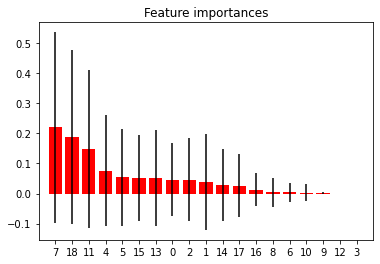

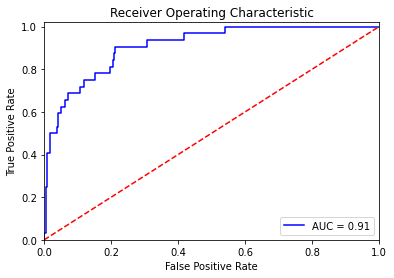

In [38]:
# Random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.inspection import permutation_importance

X_rf = df[["gdpgrowth","nmgdp","life","geo1", "infant", "trade", "lmtnest", "illiteracy", "dlang", "anocracy", "regd4_alt"
           , "sxpsq", "dem", "milper", "popdense", "inst3", "ef", "seceduc", "sxpnew"]]


X_train, X_test, y_train, y_test = train_test_split(X_rf, y, test_size=0.3, random_state=42)

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)

gini = clf.feature_importances_ #(normalize=False)


std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(gini)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_test.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], gini[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_test.shape[1]), gini[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_test.shape[1]), indices)
plt.xlim([-1, X_test.shape[1]])
plt.show()




# calculate the fpr and tpr for all thresholds of the classification
probs = clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.02])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



In [52]:
print("Tree depths: ", [t.get_depth() for t in clf.estimators_])
print("Tree number of leaves: ", [t.get_n_leaves() for t in clf.estimators_])
print(len(clf.estimators_))

# Extract individual tree from forest
tree_id = 5
tree = clf.estimators_[tree_id]

# Draw individual tree flowchart
from sklearn.tree import export_graphviz

export_graphviz(tree)

Tree depths:  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Tree number of leaves:  [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
100


'digraph Tree {\nnode [shape=box] ;\n0 [label="X[1] <= 3639.879\\ngini = 0.029\\nsamples = 3175\\nvalue = [4925, 73]"] ;\n1 [label="X[2] <= 31.617\\ngini = 0.063\\nsamples = 1204\\nvalue = [1866, 63]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="gini = 0.49\\nsamples = 3\\nvalue = [4, 3]"] ;\n1 -> 2 ;\n3 [label="gini = 0.06\\nsamples = 1201\\nvalue = [1862, 60]"] ;\n1 -> 3 ;\n4 [label="X[15] <= 0.358\\ngini = 0.006\\nsamples = 1971\\nvalue = [3059, 10]"] ;\n0 -> 4 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n5 [label="gini = 0.003\\nsamples = 1777\\nvalue = [2743, 4]"] ;\n4 -> 5 ;\n6 [label="gini = 0.037\\nsamples = 194\\nvalue = [316, 6]"] ;\n4 -> 6 ;\n}'

In [54]:

def print_decision_rules(rf):

    for tree_idx, est in enumerate(rf.estimators_):
        tree = est.tree_
        assert tree.value.shape[1] == 1 # no support for multi-output

        print('TREE: {}'.format(tree_idx))

        iterator = enumerate(zip(tree.children_left, tree.children_right, tree.feature, tree.threshold, tree.value))
        for node_idx, data in iterator:
            left, right, feature, th, value = data

            # left: index of left child (if any)
            # right: index of right child (if any)
            # feature: index of the feature to check
            # th: the threshold to compare against
            # value: values associated with classes            

            # for classifier, value is 0 except the index of the class to return
            class_idx = numpy.argmax(value[0])

            if left == -1 and right == -1:
                print('{} LEAF: return class={}'.format(node_idx, class_idx))
            else:
                print('{} NODE: if feature[{}] < {} then next={} else next={}'.format(node_idx, feature, th, left, right))    


print_decision_rules(clf)

TREE: 0
0 NODE: if feature[18] < 0.10468203574419022 then next=1 else next=4
1 NODE: if feature[5] < 50.64140319824219 then next=2 else next=3
2 LEAF: return class=0
3 LEAF: return class=0
4 NODE: if feature[16] < 0.9144400060176849 then next=5 else next=6
5 LEAF: return class=0
6 LEAF: return class=0
TREE: 1
0 NODE: if feature[5] < 50.73233985900879 then next=1 else next=4
1 NODE: if feature[2] < 32.341450691223145 then next=2 else next=3
2 LEAF: return class=1
3 LEAF: return class=0
4 NODE: if feature[17] < 40.85000038146973 then next=5 else next=6
5 LEAF: return class=0
6 LEAF: return class=0
TREE: 2
0 NODE: if feature[18] < 0.10661454126238823 then next=1 else next=4
1 NODE: if feature[15] < 0.3547232747077942 then next=2 else next=3
2 LEAF: return class=0
3 LEAF: return class=0
4 NODE: if feature[11] < 0.06259964779019356 then next=5 else next=6
5 LEAF: return class=0
6 LEAF: return class=0
TREE: 3
0 NODE: if feature[11] < 0.04399603232741356 then next=1 else next=4
1 NODE: if fea